In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import math
from numpy import genfromtxt
import png
from numpy import genfromtxt
from PIL import Image    
from matplotlib.colors import ListedColormap
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from scipy import stats
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.cluster import KMeans
from kneed import KneeLocator
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
import time

## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(filename='Ventus.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
# Read in csv
df = pd.read_csv('age_gender.csv')

# Make a copy
df_copy = df.copy()
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.shape

(23705, 5)

# Question 1

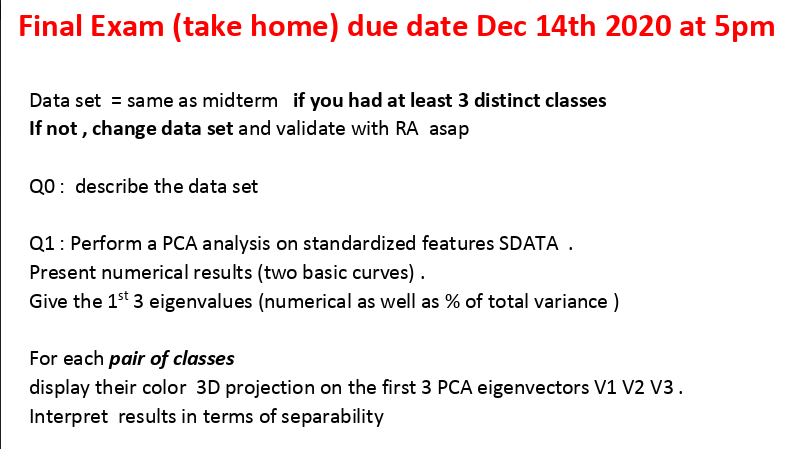

In [4]:
# Split the the pixel column so that each pixel can have it's own column
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32))

In [5]:
# Filter ages above 75
df = df[df.age <= 75]
df = df.reset_index(drop=True)

In [6]:
# Create bins for age groups
df['age_group_i'] = pd.cut(df.age, [0, 25, 50, 75], labels= [1, 2, 3])

In [7]:
# Create classes for age and gender
conditions = [
    (df["age_group_i"] == 1) & (df['gender'] == 1),
    (df["age_group_i"] == 2) & (df['gender'] == 1),
    (df["age_group_i"] == 3) & (df['gender'] == 1),
    (df["age_group_i"] == 1) & (df['gender'] == 0),
    (df["age_group_i"] == 2) & (df['gender'] == 0),
    (df["age_group_i"] == 3) & (df['gender'] == 0)
]

choices = ['FY', 'FM', 'FO', 'MY', 'MM', 'MO']

df['class'] = np.select(conditions, choices)

In [8]:
# Drop Columns that won't be used
df = df.drop(columns = ['ethnicity', 'img_name'])

In [9]:
df.isna().sum()

age            0
gender         0
pixels         0
age_group_i    0
class          0
dtype: int64

In [10]:
# Aesthetics
sns.set_style("whitegrid")

In [11]:
# Color Palette as a Dictionary
color_dic = {'MY':'blue', 'MM':'red', 'MO':'purple', 'FY':'green', 'FM':'orange', 'FO':'black'}

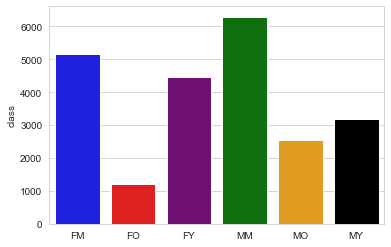

In [12]:
# Distribution of classes
sns.barplot(x=df['class'].value_counts().sort_index().index, y=df['class'].value_counts().sort_index(), palette=color_dic.values())

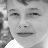

In [13]:
image = Image.fromarray((df.pixels[22853].reshape(48,48)).astype(np.uint8))

image.convert('RGB')

In [14]:
# Create appropiate column names for each pixel
col_names = []
for i in range(0,48):
    for j in range(0,48):
        col_names.append('r'+str(i)+'c'+str(j))

df[col_names] = pd.DataFrame(df.pixels.tolist(), index= df.index, columns = col_names)

In [15]:
df.head()

,age,gender,pixels,age_group_i,class,r0c0,r0c1,r0c2,r0c3,r0c4,...,r47c38,r47c39,r47c40,r47c41,r47c42,r47c43,r47c44,r47c45,r47c46,r47c47
0,1,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...",1,MY,129.0,128.0,128.0,126.0,127.0,...,123.0,129.0,134.0,138.0,142.0,144.0,144.0,146.0,146.0,146.0
1,1,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....",1,MY,164.0,74.0,111.0,168.0,169.0,...,168.0,189.0,223.0,241.0,236.0,232.0,204.0,182.0,170.0,148.0
2,1,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....",1,MY,67.0,70.0,71.0,70.0,69.0,...,117.0,113.0,116.0,116.0,117.0,117.0,115.0,112.0,111.0,108.0
3,1,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...",1,MY,193.0,197.0,198.0,200.0,199.0,...,218.0,222.0,227.0,228.0,228.0,230.0,231.0,235.0,239.0,246.0
4,1,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...",1,MY,202.0,205.0,209.0,210.0,209.0,...,165.0,167.0,167.0,167.0,168.0,171.0,171.0,167.0,163.0,161.0


In [181]:
# Only want pixels and class
df = df.loc[:,'class':]

In [182]:
# Scaling
scaler = StandardScaler()
scaler.fit(df.iloc[:,1:])
sX = scaler.transform(df.iloc[:,1:])
sX = pd.DataFrame(sX, columns = col_names)

In [19]:
# PCA
start = time.time()

pca = PCA(.95)
pca.fit(sX)
print(pca.n_components_)
pcaX = pca.transform(sX)
pcaX = pd.DataFrame(pcaX)

end = time.time()
print(end - start)


182
62.5042839050293


In [20]:
# Correlation Matrix
start = time.time()
corr_sX = sX.corr()

end = time.time()
print(end - start)

336.24097442626953


In [21]:
# Getting eigen values and eigen vectors of correlation Matrix
eigen_vals, eigen_vecs = la.eig(corr_sX)
eigen_vals = eigen_vals.real

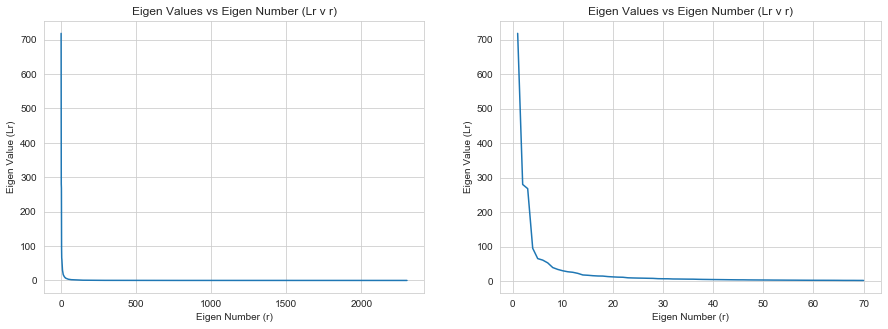

In [22]:
# Plotting eigen values for each eigen number
fig, axs = plt.subplots(1, 2, figsize = (15,5))

sns.lineplot(x = [number for number in range(1,2305)], y = eigen_vals, ax=axs[0])

axs[0].set_ylabel('Eigen Value (Lr)')
axs[0].set_xlabel('Eigen Number (r)')
axs[0].title.set_text('Eigen Values vs Eigen Number (Lr v r)')

# Zoomed in version of above
sns.lineplot(x = [number for number in range(1,71)], y = eigen_vals[0:70], ax=axs[1])

axs[1].set_ylabel('Eigen Value (Lr)')
axs[1].set_xlabel('Eigen Number (r)')
axs[1].title.set_text('Eigen Values vs Eigen Number (Lr v r)')

In [23]:
# Proportion of Variance Explained after each r
W = eigen_vecs.transpose()
PVE_r = np.cumsum(eigen_vals / len(W))

Text(0.5, 1.0, 'Cumulative Scree Plot')

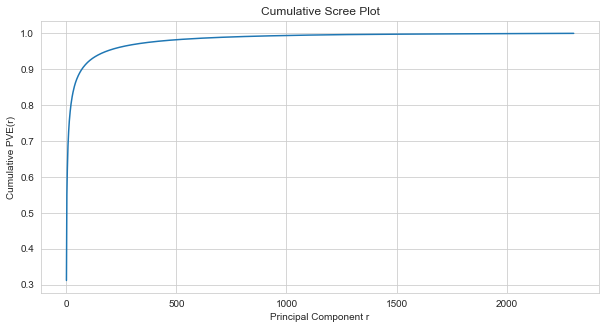

In [24]:
# Plotting PVE
fig, axs = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x = [number for number in range(1,2305)], y = PVE_r)

plt.ylabel('Cumulative PVE(r)')
plt.xlabel('Principal Component r')
plt.title('Cumulative Scree Plot')

In [25]:
# Getting the first 3 eigen numbers had their eigenvalues, and PVE
pca_coor = pd.DataFrame({'r':[number for number in range(1,4)],
                         'eigen values' : eigen_vals[:3],
                         'percentage of variance explained': eigen_vals[:3] / len(W)})

pca_coor

,r,eigen values,percentage of variance explained
0,1,718.385407,0.311799
1,2,280.394813,0.121699
2,3,268.267707,0.116436


In [26]:
# Creating DataFrame to plot the first 3 PCA vectors with respective class
threeD = pcaX.iloc[:,0:3].join(df.loc[:,'class'])

In [27]:
threeD.head()

,0,1,2,class
0,-4.670395,0.256803,4.672748,MY
1,-22.321326,15.258316,22.474049,MY
2,-26.885165,-27.539542,0.591185,MY
3,-60.141644,-5.951043,25.919300,MY
4,-65.917363,1.759301,14.984215,MY


In [28]:
# Getting classes names in a list
classes = threeD['class'].unique()

In [165]:
# Getting classes names in a list
classes = threeD['class'].unique()

# Creating combinations for each class
iteration_obj = combinations(classes, 2)

pairs = [' '.join(i) for i in iteration_obj] 
pairs = [pair.split() for pair in pairs]
pairs

[['MY', 'FY'],
 ['MY', 'FM'],
 ['MY', 'MM'],
 ['MY', 'FO'],
 ['MY', 'MO'],
 ['FY', 'FM'],
 ['FY', 'MM'],
 ['FY', 'FO'],
 ['FY', 'MO'],
 ['FM', 'MM'],
 ['FM', 'FO'],
 ['FM', 'MO'],
 ['MM', 'FO'],
 ['MM', 'MO'],
 ['FO', 'MO']]

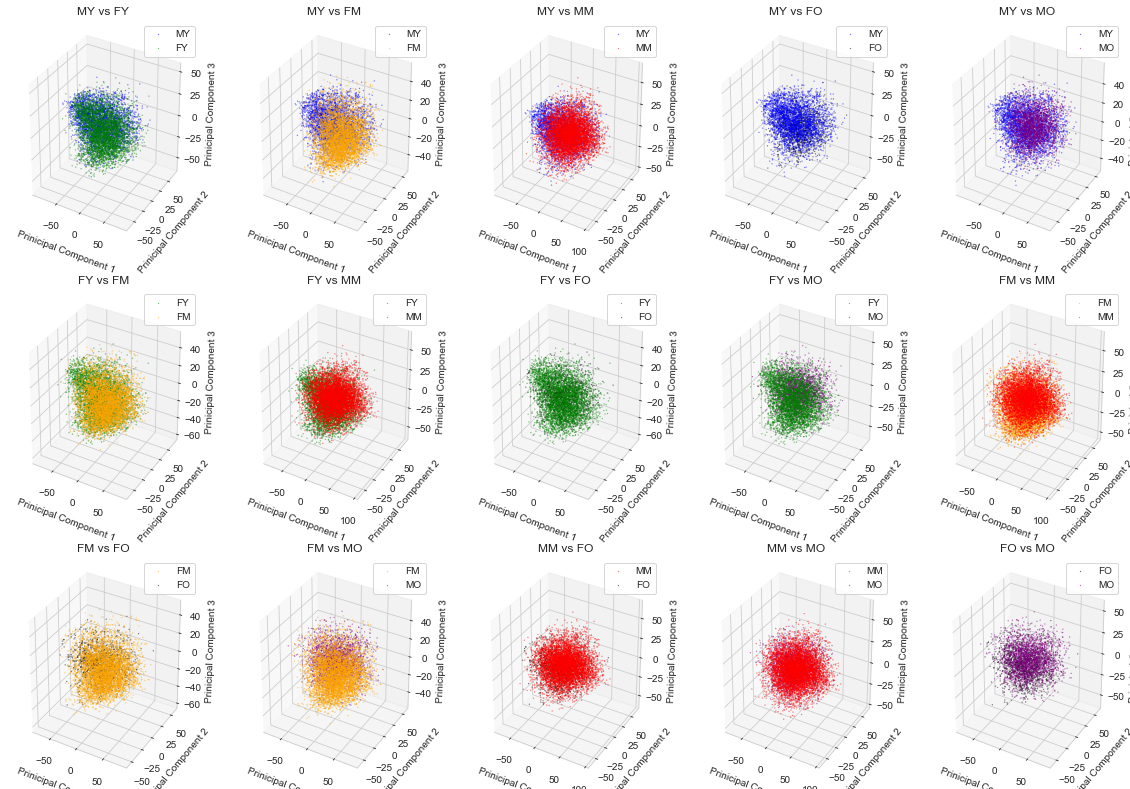

In [30]:
# axes instance
fig = plt.figure(figsize = (20,14))
ax = []

for i in range(0, len(pairs)):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    # plot
    ax.scatter(threeD[threeD['class'] == pairs[i][0]].iloc[:,0], threeD[threeD['class'] == pairs[i][0]].iloc[:,1], threeD[threeD['class'] == pairs[i][0]].iloc[:,2], alpha = 1, s = .05, color = color_dic[pairs[i][0]])
    ax.scatter(threeD[threeD['class'] == pairs[i][1]].iloc[:,0], threeD[threeD['class'] == pairs[i][1]].iloc[:,1], threeD[threeD['class'] == pairs[i][1]].iloc[:,2], alpha = 1, s = .05, color = color_dic[pairs[i][1]])

    ax.set_xlabel('Prinicipal Component 1')
    ax.set_ylabel('Prinicipal Component 2')
    ax.set_zlabel('Prinicipal Component 3')
    ax.title.set_text('%s vs %s' % (pairs[i][0], pairs[i][1]))

    # legend
    ax.legend(labels=[pairs[i][0],pairs[i][1]])

# Question 2

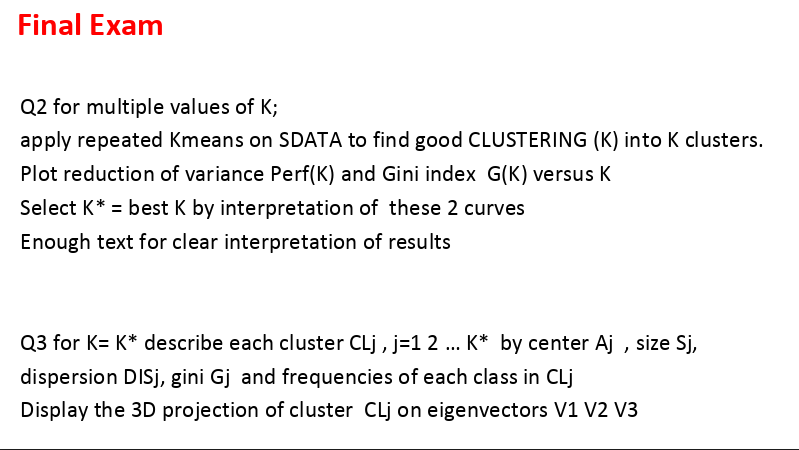

In [31]:
# Running Kmeans
k = list(range(1,11))
sum_disp_k = []
centers_k = []
labels_k = []

start = time.time()

for i in k:
    kmeans = KMeans(n_clusters=i, n_init=50, random_state=0)
    kmeans.fit(sX)
    sum_disp_k.append(kmeans.inertia_)
    centers_k.append(kmeans.cluster_centers_)
    labels_k.append(kmeans.labels_)    
    
end = time.time()
print(end - start)

2363.5472223758698


In [95]:
kl = KneeLocator(k, sum_disp_k, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [96]:
sum_disp_k

[52655616.00000026,
 42095796.22736164,
 38743448.53822632,
 36306117.03374624,
 34666458.70158382,
 33582702.24189258,
 32658620.692557815,
 31927598.782868233,
 31368936.886002198,
 30883700.517010648]

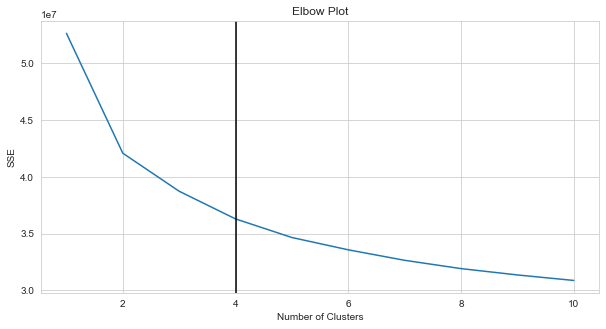

In [97]:
fig, axs = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x=k, y=sum_disp_k)

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.axvline(x=kl.elbow, color = 'Black')

In [98]:
perf_k = []
for i in range(0,len(sum_disp_k)):
    perf_k.append(1 - (sum_disp_k[i]/sum_disp_k[0]))

perf_k

[0.0,
 0.20054498598285442,
 0.2642105157743073,
 0.3104986743722443,
 0.3416379612464576,
 0.36221993411125575,
 0.37976946860601435,
 0.39365254443385345,
 0.4042622749679342,
 0.41347755732246116]

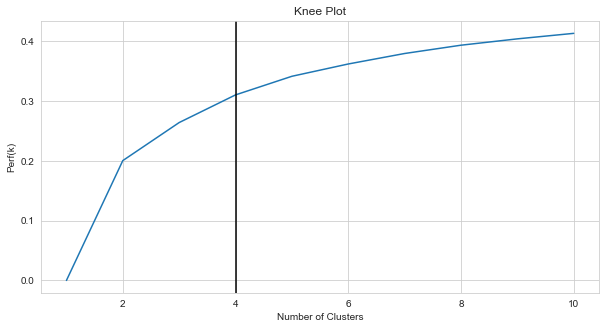

In [293]:
fig, axs = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x=k, y=perf_k)

plt.xlabel('Number of Clusters')
plt.ylabel('Perf(k)')
plt.title('Knee Plot')
plt.axvline(x=kl.elbow, color = 'Black')

In [100]:
clusterX = sX.copy()

In [101]:
for i in range(1,len(labels_k)+1):
    clusterX['clusterk'+str(i)]=labels_k[i-1]

In [116]:
print(clusterX.shape)
clusterX.head()

(22854, 2325)


,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,clusterk2,clusterk3,clusterk4,clusterk5,clusterk6,clusterk7,clusterk8,clusterk9,clusterk10,class
0,0.576152,0.623301,0.659906,0.637140,0.629673,0.622634,0.594041,0.529915,0.491089,0.441334,...,1,0,2,4,4,3,5,6,3,MY
1,1.074744,-0.173171,0.401842,1.291656,1.296929,1.283150,1.280058,1.306439,1.243496,1.222190,...,1,2,0,2,0,1,5,6,0,MY
2,-0.307069,-0.232169,-0.205369,-0.235547,-0.291775,-0.392305,-0.434986,-0.395306,-0.328199,-0.220697,...,1,2,0,2,0,6,0,8,3,MY
3,1.487864,1.641014,1.722525,1.790334,1.773540,1.750344,1.721069,1.653396,1.577899,1.510767,...,1,2,0,2,0,1,4,1,2,MY
4,1.616073,1.759010,1.889508,1.946171,1.932410,1.895335,1.851739,1.785571,1.711661,1.663544,...,1,2,0,2,0,1,4,1,2,MY


In [103]:
clusterX = clusterX.join(df.loc[:,'class'])

In [104]:
FJS = []

for i in range(1, len(labels_k)+1):
    FJS_temp = []
    for j in range(0,i):
        FJS_temp.append(clusterX[clusterX['clusterk'+str(i)] == j]['class'].value_counts().sort_index() / len(clusterX[clusterX['clusterk'+str(i)] == j]))
    print('This is fj for clusterk' + str(i), FJS_temp)
    FJS.append(FJS_temp)

This is fj for clusterk1 [FM    0.226044
FO    0.052726
FY    0.195327
MM    0.275488
MO    0.111578
MY    0.138838
Name: class, dtype: float64]
This is fj for clusterk2 [FM    0.246401
FO    0.043005
FY    0.145626
MM    0.343023
MO    0.121170
MY    0.100775
Name: class, dtype: float64, FM    0.207688
FO    0.061491
FY    0.240140
MM    0.214595
MO    0.102929
MY    0.173157
Name: class, dtype: float64]
This is fj for clusterk3 [FM    0.307851
FO    0.062120
FY    0.232321
MM    0.216504
MO    0.089054
MY    0.092149
Name: class, dtype: float64, FM    0.200467
FO    0.038610
FY    0.119951
MM    0.395438
MO    0.136713
MY    0.108821
Name: class, dtype: float64, FM    0.149029
FO    0.055758
FY    0.228288
MM    0.223179
MO    0.113560
MY    0.230185
Name: class, dtype: float64]
This is fj for clusterk4 [FM    0.149284
FO    0.062651
FY    0.253951
MM    0.190742
MO    0.098345
MY    0.245027
Name: class, dtype: float64, FM    0.205037
FO    0.036893
FY    0.120255
MM    0.401383
MO 

In [105]:
GINI = []

for i in range(0,len(FJS)):
    gini_temp = []
    for j in range(0, i+1):
        gini_sum = None
        f1s = []
        for a in range(0,6):
            f1s.append(FJS[i][j][a] * (1-FJS[i][j][a]))
        gini_sum = sum(f1s)
        gini_temp.append(gini_sum)
    print('This is gini for clusterk' + str(i), gini_temp)
    GINI.append(gini_temp)

This is gini for clusterk0 [0.8003525547115051]
This is gini for clusterk1 [0.7737275438188416, 0.8087886199213966]
This is gini for clusterk2 [0.7840995722531015, 0.7570300553807751, 0.8068758270401987]
This is gini for clusterk3 [0.8032057216718768, 0.7528559749060025, 0.7946710305378788, 0.7931809398706433]
This is gini for clusterk4 [0.7525521342419793, 0.7554516733993919, 0.7999663994951134, 0.795674651118957, 0.7702501641737978]
This is gini for clusterk5 [0.7888811808289852, 0.7844695, 0.790154428512842, 0.7690114349097378, 0.7666986429608881, 0.7433588943155478]
This is gini for clusterk6 [0.7532662530191953, 0.7888971280366748, 0.7316895963951088, 0.7617573083870405, 0.7841830533235938, 0.7961172357412886, 0.7947005866049013]
This is gini for clusterk7 [0.8033481190894125, 0.7430274119860253, 0.7622651374599426, 0.7573166942159517, 0.7733893731566496, 0.7930914453921172, 0.7356080916076799, 0.7862727521337279]
This is gini for clusterk8 [0.7507522907429135, 0.7731044035993755,

In [106]:
IMP = []

for i in range(0,len(GINI)):
    IMP.append(sum(GINI[i]))

In [107]:
[j-i for i, j in zip(IMP[:-1], IMP[1:])]

[0.7821636090287332,
 0.7654892909338371,
 0.7959082123123262,
 0.7299813554428374,
 0.768679059098762,
 0.768037079979802,
 0.7437078635337038,
 0.754542152523479,
 0.7591308412978517]

Text(0.5, 1.0, 'Impurity by Cluster')

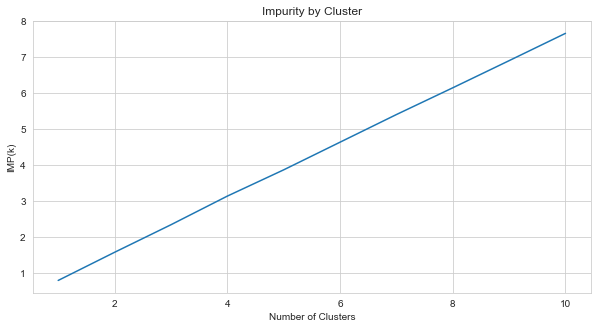

In [108]:
fig, axs = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x=k, y=IMP)

plt.xlabel('Number of Clusters')
plt.ylabel('IMP(k)')
plt.title('Impurity by Cluster')

# Question 3

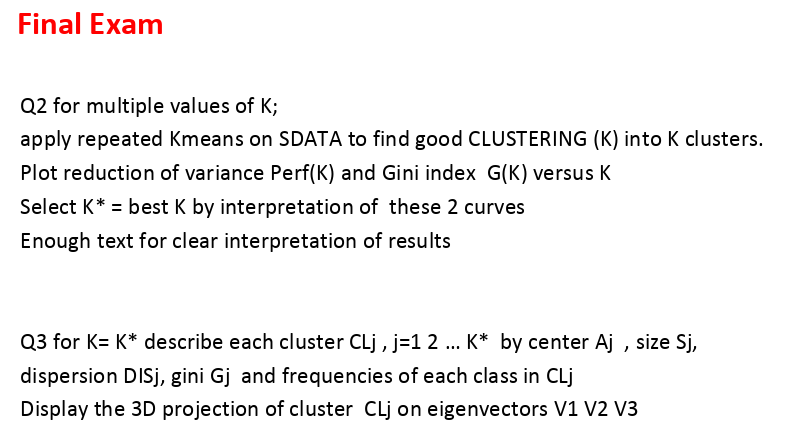

In [294]:
centers_k[3]

array([[ 0.50777925,  0.53792137,  0.56835063, ...,  0.58895085,
         0.57929887,  0.56738871],
       [-0.14363766, -0.17108349, -0.20965774, ..., -0.16663767,
        -0.15275791, -0.1357672 ],
       [-0.06935856, -0.03577711,  0.00715244, ..., -0.38620667,
        -0.37440263, -0.35983831],
       [-0.25117224, -0.28448299, -0.31661612, ...,  0.00088484,
        -0.01474553, -0.03390445]])

In [119]:
#center
print(centers_k[3])

#size
print(pd.Series(labels_k[3]).value_counts())

#ginis
print(GINI[3])

#frequencies
print(FJS[3])


# Calculate Disp(j) for each Cluster j #align SDATA with cluster assignment from K*
SDATA_CLUS1 = clusterX[clusterX['clusterk4'] == 0]
SDATA_CLUS2 = clusterX[clusterX['clusterk4'] == 1]
SDATA_CLUS3 = clusterX[clusterX['clusterk4'] == 2]
SDATA_CLUS4 = clusterX[clusterX['clusterk4'] == 3]

# only want the data for each observation in each cluster, so we drop the "cluster" column
CL1_SDATA = SDATA_CLUS1.iloc[:,:2304]
CL2_SDATA = SDATA_CLUS2.iloc[:,:2304]
CL3_SDATA = SDATA_CLUS3.iloc[:,:2304]
CL4_SDATA = SDATA_CLUS4.iloc[:,:2304]


# get each cluster center
CLUS1_cntr = centers_k[3][0]
CLUS2_cntr = centers_k[3][1]
CLUS3_cntr = centers_k[3][2]
CLUS4_cntr = centers_k[3][3]

#calculte the difference between the vector of each observation in cluster j and the center of cluster j
norms1 = []
for i in range(len(CL1_SDATA)):
    norms1.append(np.linalg.norm(CL1_SDATA.iloc[i] - CLUS1_cntr))

norms2 = []
for i in range(len(CL2_SDATA)):
    norms2.append(np.linalg.norm(CL2_SDATA.iloc[i] - CLUS2_cntr))

norms3 = []
for i in range(len(CL3_SDATA)):
    norms3.append(np.linalg.norm(CL3_SDATA.iloc[i] - CLUS3_cntr))

norms4 = []
for i in range(len(CL4_SDATA)):
    norms4.append(np.linalg.norm(CL4_SDATA.iloc[i] - CLUS4_cntr))

# Square each norm for each cluster j
sq_norms1 = np.square(np.array(norms1)) #can only square an array, not a list
sq_norms2 = np.square(np.array(norms2))
sq_norms3 = np.square(np.array(norms3))
sq_norms4 = np.square(np.array(norms4))

# sum up all of the above values for each cluster j
DIS_CL1 = sum(sq_norms1)
DIS_CL2 = sum(sq_norms2)
DIS_CL3 = sum(sq_norms3)
DIS_CL4 = sum(sq_norms4)

[[ 0.50777925  0.53792137  0.56835063 ...  0.58895085  0.57929887
   0.56738871]
 [-0.14363766 -0.17108349 -0.20965774 ... -0.16663767 -0.15275791
  -0.1357672 ]
 [-0.06935856 -0.03577711  0.00715244 ... -0.38620667 -0.37440263
  -0.35983831]
 [-0.25117224 -0.28448299 -0.31661612 ...  0.00088484 -0.01474553
  -0.03390445]]
3    6054
2    5783
1    5638
0    5379
dtype: int64
[0.8032057216718768, 0.7528559749060025, 0.7946710305378788, 0.7931809398706433]
[FM    0.149284
FO    0.062651
FY    0.253951
MM    0.190742
MO    0.098345
MY    0.245027
Name: class, dtype: float64, FM    0.205037
FO    0.036893
FY    0.120255
MM    0.401383
MO    0.128769
MY    0.107662
Name: class, dtype: float64, FM    0.263012
FO    0.056372
FY    0.201971
MM    0.261975
MO    0.114646
MY    0.102023
Name: class, dtype: float64, FM    0.278494
FO    0.055170
FY    0.206805
MM    0.246449
MO    0.104394
MY    0.108688
Name: class, dtype: float64]


In [295]:
print(DIS_CL1, DIS_CL2,DIS_CL3,DIS_CL4)

8402818.215122009 8726895.455091175 9345696.662962979 9830706.700570015


In [122]:
W = pd.DataFrame(W)

In [184]:
cluster4 = pcaX.iloc[:,0:3].join(clusterX['clusterk4'])

In [185]:
cluster4.head()

,0,1,2,clusterk4
0,-4.670395,0.256803,4.672748,2
1,-22.321326,15.258316,22.474049,0
2,-26.885165,-27.539542,0.591185,0
3,-60.141644,-5.951043,25.919300,0
4,-65.917363,1.759301,14.984215,0


In [186]:
# Getting classes names in a list
clusters = ['0','1','2','3']

# Creating combinations for each class
iteration_obj = combinations(clusters, 2)

pairs_num = list(iteration_obj)

'cyan'

In [296]:
cluster_color = {0:'cyan', 1:'deeppink', 2:'yellowgreen', 3:'tomato'}

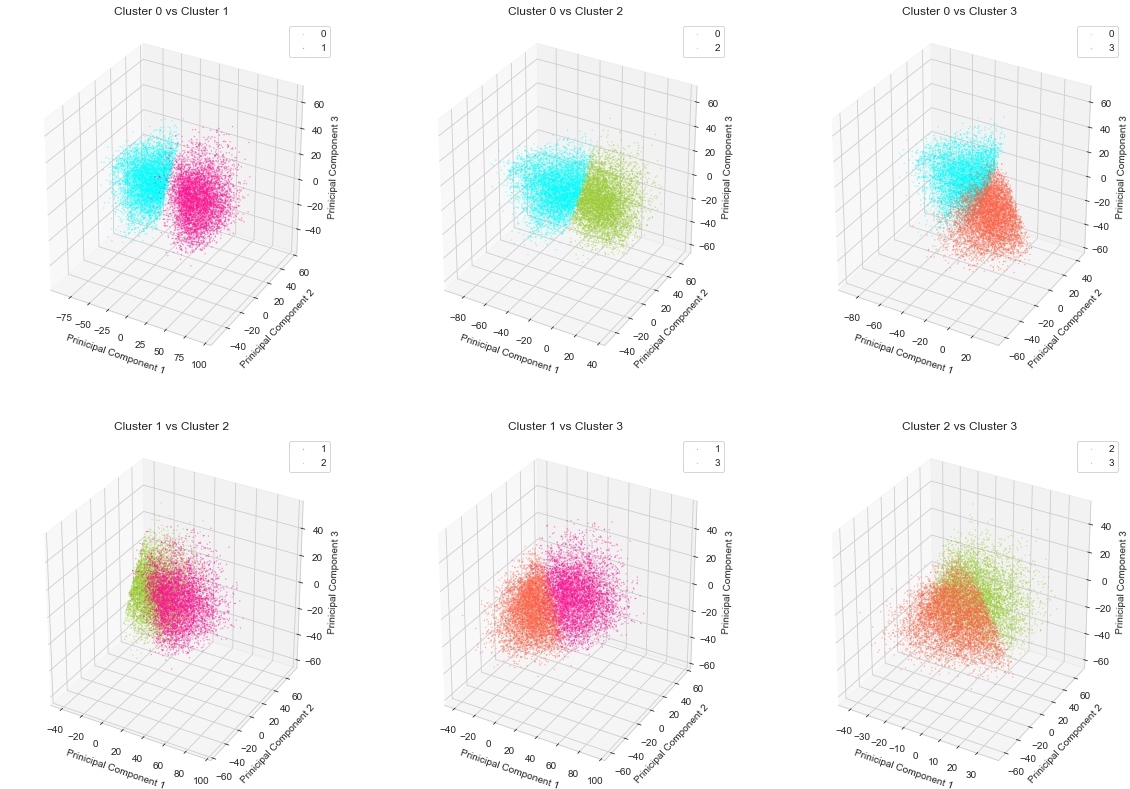

In [303]:
# axes instance
# axes instance
fig = plt.figure(figsize = (20,14))
ax = []

for i in range(0, len(pairs_num)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    # plot
    ax.scatter(cluster4[cluster4['clusterk4'] == int(pairs_num[i][0])].iloc[:,0], cluster4[cluster4['clusterk4'] == int(pairs_num[i][0])].iloc[:,1], cluster4[cluster4['clusterk4'] == int(pairs_num[i][0])].iloc[:,2], alpha = 1, s = .05, color = cluster_color[int(pairs_num[i][0])])
    ax.scatter(cluster4[cluster4['clusterk4'] == int(pairs_num[i][1])].iloc[:,0], cluster4[cluster4['clusterk4'] == int(pairs_num[i][1])].iloc[:,1], cluster4[cluster4['clusterk4'] == int(pairs_num[i][1])].iloc[:,2], alpha = 1, s = .05, color = cluster_color[int(pairs_num[i][1])])

    ax.set_xlabel('Prinicipal Component 1')
    ax.set_ylabel('Prinicipal Component 2')
    ax.set_zlabel('Prinicipal Component 3')
    ax.title.set_text('Cluster %s vs Cluster %s' % (pairs_num[i][0], pairs_num[i][1]))

    # legend
    ax.legend(labels=[pairs_num[i][0],pairs_num[i][1]])

# Question 4

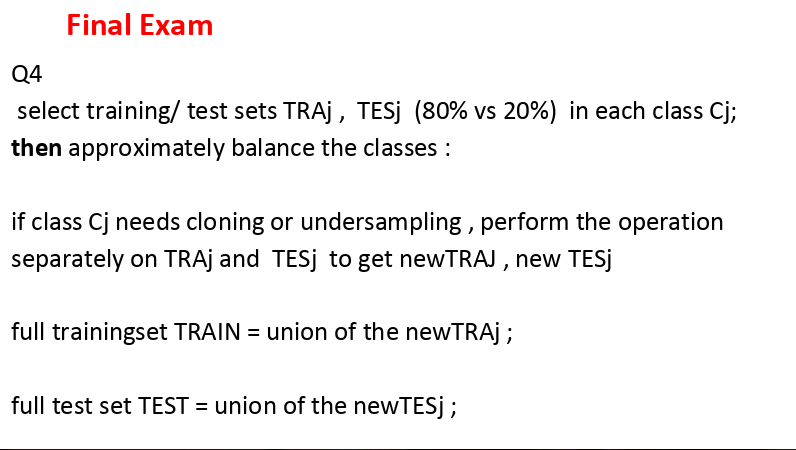

In [189]:
sdf = sX.join(df.loc[:,'class'])

In [190]:
# train and test split
sdfFY_train, sdfFY_test, clFY_train, clFY_test = train_test_split(sdf[sdf['class'] == 'FY'].iloc[:,0:2304], sdf[sdf['class'] == 'FY'].iloc[:,2304], test_size=0.2, random_state=0)
sdfFM_train, sdfFM_test, clFM_train, clFM_test = train_test_split(sdf[sdf['class'] == 'FM'].iloc[:,0:2304], sdf[sdf['class'] == 'FM'].iloc[:,2304], test_size=0.2, random_state=0)
sdfFO_train, sdfFO_test, clFO_train, clFO_test = train_test_split(sdf[sdf['class'] == 'FO'].iloc[:,0:2304], sdf[sdf['class'] == 'FO'].iloc[:,2304], test_size=0.2, random_state=0)
sdfMY_train, sdfMY_test, clMY_train, clMY_test = train_test_split(sdf[sdf['class'] == 'MY'].iloc[:,0:2304], sdf[sdf['class'] == 'MY'].iloc[:,2304], test_size=0.2, random_state=0)
sdfMM_train, sdfMM_test, clMM_train, clMM_test = train_test_split(sdf[sdf['class'] == 'MM'].iloc[:,0:2304], sdf[sdf['class'] == 'MM'].iloc[:,2304], test_size=0.2, random_state=0)
sdfMO_train, sdfMO_test, clMO_train, clMO_test = train_test_split(sdf[sdf['class'] == 'MO'].iloc[:,0:2304], sdf[sdf['class'] == 'MO'].iloc[:,2304], test_size=0.2, random_state=0)

In [191]:
X_train = pd.concat([sdfFY_train, sdfFM_train, sdfFO_train, sdfMY_train, sdfMM_train, sdfMO_train]) 
X_test = pd.concat([sdfFY_test, sdfFM_test, sdfFO_test, sdfMY_test, sdfMM_test, sdfMO_test])
y_train = pd.concat([clFY_train, clFM_train, clFO_train, clMY_train, clMM_train, clMO_train])
y_test = pd.concat([clFY_test, clFM_test, clFO_test, clMY_test, clMM_test, clMO_test])

In [192]:
print(len(sdfFO_train))
print(len(sdfMO_train))
print(len(sdfMY_train))
print(len(sdfFY_train))
print(len(sdfFM_train))
print(len(sdfMM_train))

964
2040
2538
3571
4132
5036


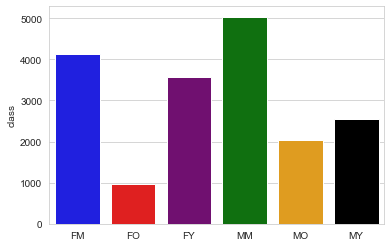

In [305]:
sns.barplot(x=y_train.value_counts().sort_index().index, y=y_train.value_counts().sort_index(), palette=color_dic.values())

In [194]:
upper = {'FO':2800, 'MO':2900, 'MY': 3000}

In [195]:
sm = SMOTE(random_state=0, sampling_strategy=upper, k_neighbors=30)
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_train))

Resampled dataset shape Counter({'MM': 5036, 'FM': 4132, 'FY': 3571, 'MY': 3000, 'MO': 2900, 'FO': 2800})


In [196]:
under = {'MM': 3300, 'FM': 3200, 'FY': 3100}

In [197]:
rus = RandomUnderSampler(random_state=0, sampling_strategy=under)
X_res_train, y_res_train = rus.fit_resample(X_res_train, y_res_train)
print('Resampled dataset shape %s' % Counter(y_res_train))

Resampled dataset shape Counter({'MM': 3300, 'FM': 3200, 'FY': 3100, 'MY': 3000, 'MO': 2900, 'FO': 2800})


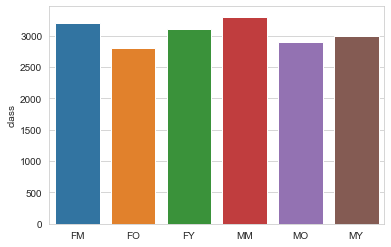

In [198]:
sns.barplot(x=y_res_train.value_counts().sort_index().index, y=y_res_train.value_counts().sort_index())

In [199]:
print(len(sdfFO_test))
print(len(sdfMO_test))
print(len(sdfMY_test))
print(len(sdfFY_test))
print(len(sdfFM_test))
print(len(sdfMM_test))

241
510
635
893
1034
1260


In [309]:
upper = {'FO':720, 'MO':740, 'MY':760}
under = {'FY':780, 'FM':800, 'MM':820}

sm = SMOTE(random_state=0, sampling_strategy=upper, k_neighbors = 30)
X_res_test, y_res_test = sm.fit_resample(X_test, y_test)
print('Resampled dataset shape %s' % Counter(y_res_test))

rus = RandomUnderSampler(random_state=0, sampling_strategy=under)
X_res_test, y_res_test = rus.fit_resample(X_res_test, y_res_test)
print('Resampled dataset shape %s' % Counter(y_res_test))

Resampled dataset shape Counter({'MM': 1260, 'FM': 1034, 'FY': 893, 'MY': 760, 'MO': 740, 'FO': 720})
Resampled dataset shape Counter({'MM': 820, 'FM': 800, 'FY': 780, 'MY': 760, 'MO': 740, 'FO': 720})


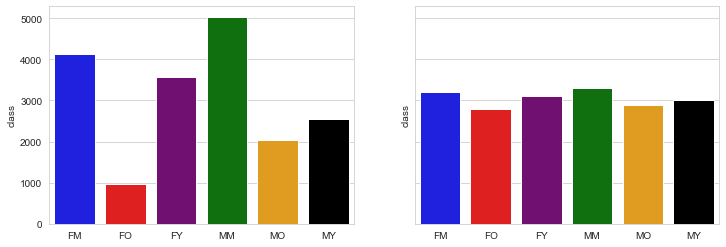

In [307]:
# axes instance
fig, ax = plt.subplots(1,2, figsize = (12,4), sharey = True)

sns.barplot(x=y_train.value_counts().sort_index().index, y=y_train.value_counts().sort_index(), ax = ax[0], palette = color_dic.values())
sns.barplot(x=y_res_train.value_counts().sort_index().index, y=y_res_train.value_counts().sort_index(), ax = ax[1], palette = color_dic.values())

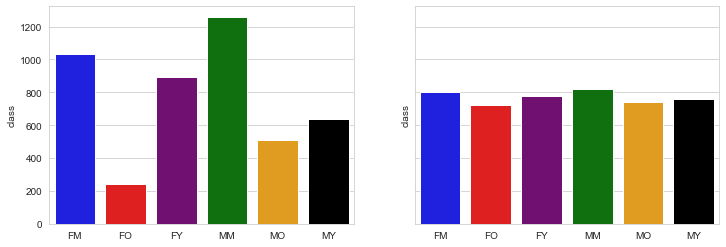

In [310]:
# axes instance
fig, ax = plt.subplots(1,2, figsize = (12,4), sharey=True)

sns.barplot(x=y_test.value_counts().sort_index().index, y=y_test.value_counts().sort_index(), ax = ax[0], palette = color_dic.values())
sns.barplot(x=y_res_test.value_counts().sort_index().index, y=y_res_test.value_counts().sort_index(), ax = ax[1], palette = color_dic.values())

# Question 5

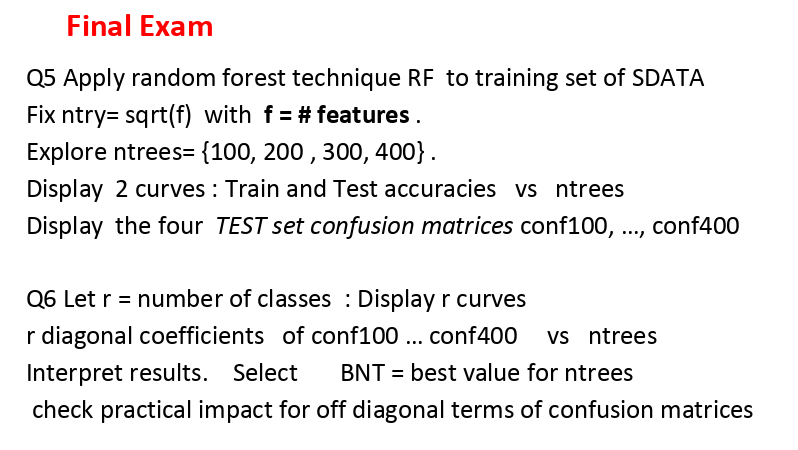

In [217]:
ntrees = [100,200,300,400]
f = len(X_train.columns)
y_pred_train = []
y_pred_test = []
oob_score = []

start = time.time()

for tree in ntrees:
    clf = RandomForestClassifier(n_estimators=tree, max_features= round(math.sqrt(f)), random_state=0, oob_score=True)
    clf.fit(X_res_train, y_res_train)
    y_pred_train.append(clf.predict(X_res_train))
    y_pred_test.append(clf.predict(X_res_test))
    oob_score.append(clf.oob_score_)

end = time.time()
print(end - start)

1380.0335521697998


In [218]:
y_pred_train

[array(['FM', 'FM', 'FM', ..., 'MY', 'MY', 'MY'], dtype=object),
 array(['FM', 'FM', 'FM', ..., 'MY', 'MY', 'MY'], dtype=object),
 array(['FM', 'FM', 'FM', ..., 'MY', 'MY', 'MY'], dtype=object),
 array(['FM', 'FM', 'FM', ..., 'MY', 'MY', 'MY'], dtype=object)]

In [219]:
y_pred_test

[array(['FM', 'MM', 'FM', ..., 'FY', 'MY', 'MM'], dtype=object),
 array(['FM', 'MM', 'FM', ..., 'FY', 'MY', 'MM'], dtype=object),
 array(['FM', 'MM', 'FM', ..., 'FY', 'MY', 'MM'], dtype=object),
 array(['FM', 'MM', 'FM', ..., 'FY', 'MY', 'MM'], dtype=object)]

In [220]:
accuracies_train = []
accuracies_test = []
for i in range(0, len(ntrees)):
    accuracies_train.append(accuracy_score(y_true=y_res_train, y_pred = y_pred_train[i]))
    accuracies_test.append(accuracy_score(y_true=y_res_test, y_pred = y_pred_test[i]))

In [221]:
print(accuracies_test)
print(accuracies_train)
print(oob_score)

[0.5320346320346321, 0.5383116883116883, 0.5426406926406926, 0.5456709956709956]
[0.9981420765027322, 0.9981420765027322, 0.9981420765027322, 0.9981420765027322]
[0.6, 0.6230601092896175, 0.6306010928961748, 0.6347540983606558]


In [317]:
train_test_oob = {'Train':'blue','Test':'orange', 'OOB':'green'}

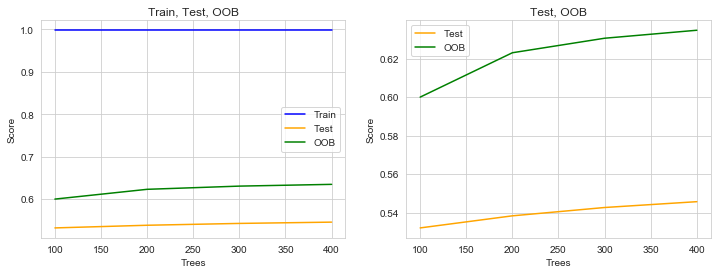

In [318]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.lineplot(x = ntrees, y = accuracies_train, ax=ax[0], color = 'blue')
sns.lineplot(x = ntrees, y = accuracies_test, ax=ax[0], color = 'orange')
sns.lineplot(x = ntrees, y = oob_score, ax=ax[0], color = 'green')
ax[0].set_ylabel('Score')
ax[0].set_xlabel('Trees')
ax[0].title.set_text('Train, Test, OOB')
ax[0].legend(labels=['Train','Test','OOB'])

sns.lineplot(x = ntrees, y = accuracies_test, ax=ax[1], color = 'orange')
sns.lineplot(x = ntrees, y = oob_score, ax=ax[1], color = 'green')
ax[1].set_ylabel('Score')
ax[1].set_xlabel('Trees')
ax[1].title.set_text('Test, OOB')
ax[1].legend(labels=['Test','OOB'])

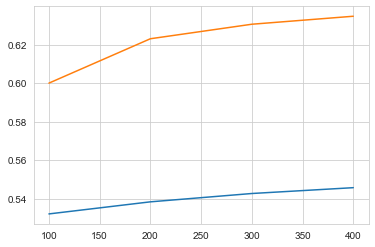

In [311]:
sns.lineplot(x = ntrees, y = accuracies_test)
sns.lineplot(x = ntrees, y = oob_score)

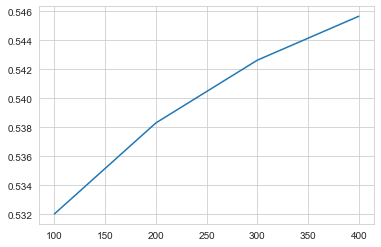

In [223]:
sns.lineplot(x = ntrees, y = accuracies_test)

In [224]:
classes
classes_index =[]
classes_columns = []
for i in range(0,len(classes)):
    classes_index.append('true:%s'%classes[i])
    classes_columns.append('pred:%s'%classes[i])

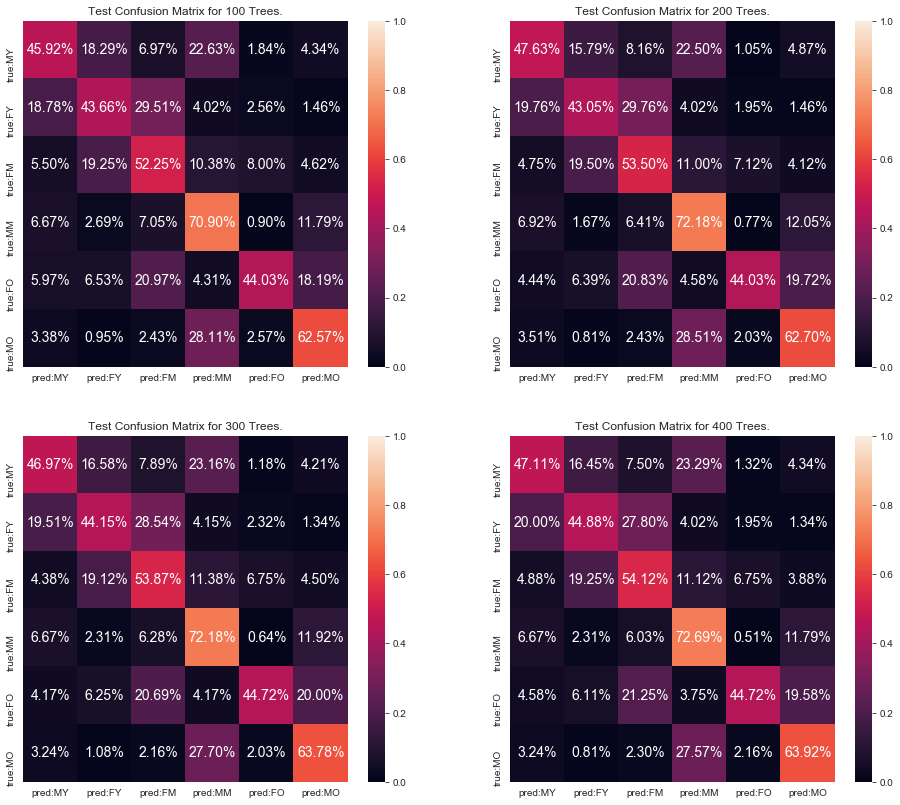

In [225]:
fig = plt.figure(figsize = (16,14))
axes = []

for i in range(0,len(ntrees)):
    axes.append(fig.add_subplot(2, 2, i+1))
    
    cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_res_test,y_pred = y_pred_test[i], labels = classes, normalize = 'true'),
    index=classes_index, 
    columns=classes_columns)

    sns.heatmap(cmtx_a_test, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1, ax=axes[i])
    axes[i].title.set_text('Test Confusion Matrix for '+str(ntrees[i])+' Trees.')

# Question 6

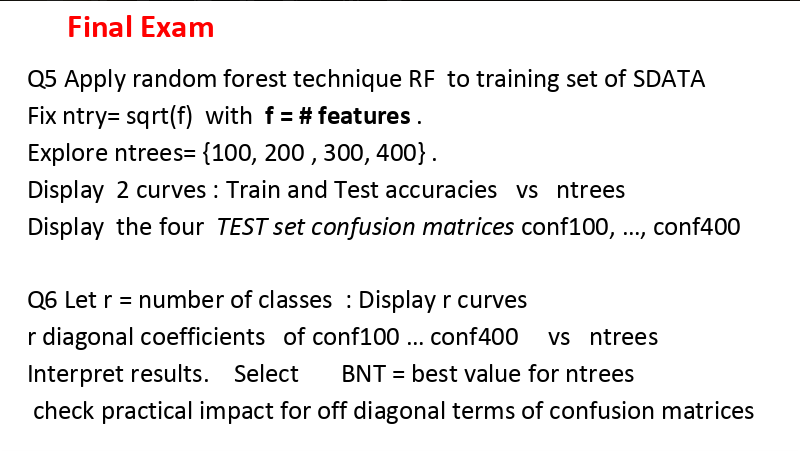

In [227]:
diag = []
for i in range(0,len(ntrees)):    
    cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_res_test,y_pred = y_pred_test[i], labels = classes, normalize = 'true'),
    index=classes_index, 
    columns=classes_columns)
    diag.append(np.diagonal(cmtx_a_test))
    
diag

[array([0.45921053, 0.43658537, 0.5225    , 0.70897436, 0.44027778,
        0.62567568]),
 array([0.47631579, 0.4304878 , 0.535     , 0.72179487, 0.44027778,
        0.62702703]),
 array([0.46973684, 0.44146341, 0.53875   , 0.72179487, 0.44722222,
        0.63783784]),
 array([0.47105263, 0.44878049, 0.54125   , 0.72692308, 0.44722222,
        0.63918919])]

In [228]:
diag = np.transpose(diag)

In [330]:
diag

array([[0.45921053, 0.47631579, 0.46973684, 0.47105263],
       [0.43658537, 0.4304878 , 0.44146341, 0.44878049],
       [0.5225    , 0.535     , 0.53875   , 0.54125   ],
       [0.70897436, 0.72179487, 0.72179487, 0.72692308],
       [0.44027778, 0.44027778, 0.44722222, 0.44722222],
       [0.62567568, 0.62702703, 0.63783784, 0.63918919]])

In [333]:
pd.Series(classes).sort_values()

2    FM
4    FO
1    FY
3    MM
5    MO
0    MY
dtype: object

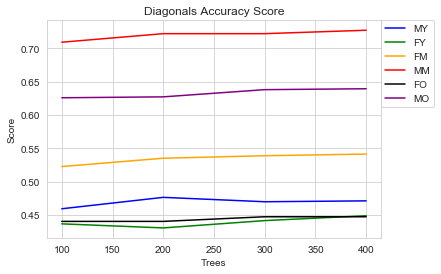

In [329]:
for i in range(0, len(diag)):
    sns.lineplot(x=ntrees,y=diag[i], color=color_dic[classes[i]])

plt.ylabel('Score')
plt.xlabel('Trees')
plt.title('Diagonals Accuracy Score')    
plt.legend(labels = classes, loc=(1,.60))



# Question 7

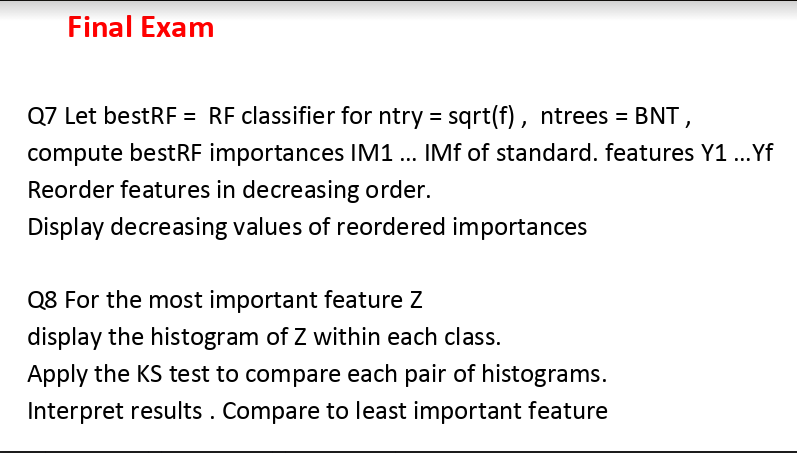

In [230]:
y_pred_train_best = None
y_pred_test_best = None
y_pred_train_oob = None

bestRF = RandomForestClassifier(n_estimators=300, max_features= round(math.sqrt(f)), random_state=0, oob_score=True)
bestRF.fit(X_res_train, y_res_train)
y_pred_train_best = bestRF.predict(X_res_train)
y_pred_test_best = bestRF.predict(X_res_test)
y_pred_train_oob = bestRF.oob_score_

In [231]:
feature_impdf = pd.DataFrame({'feature_importance': bestRF.feature_importances_, 'features':sX.columns})
feature_impdf = feature_impdf.set_index('features')

In [233]:
feature_impdf['feature_importance'].sort_values(ascending = False)[0:50]

features
r12c11    0.002318
r15c33    0.002255
r13c37    0.002251
r15c13    0.002139
r15c14    0.002114
r13c10    0.002098
r29c21    0.002040
r12c12    0.002013
r12c35    0.002010
r13c9     0.001875
r29c25    0.001848
r13c36    0.001839
r29c26    0.001832
r29c22    0.001782
r12c10    0.001770
r29c20    0.001747
r29c27    0.001741
r12c34    0.001681
r30c23    0.001674
r15c34    0.001652
r29c24    0.001606
r29c28    0.001539
r15c32    0.001504
r30c22    0.001499
r12c36    0.001456
r15c12    0.001420
r29c19    0.001350
r29c23    0.001319
r30c24    0.001303
r14c13    0.001299
r13c35    0.001292
r12c37    0.001263
r28c26    0.001245
r12c20    0.001214
r30c27    0.001193
r12c26    0.001180
r13c11    0.001162
r30c25    0.001138
r14c12    0.001136
r1c2      0.001131
r29c18    0.001129
r28c20    0.001123
r12c13    0.001120
r27c24    0.001119
r28c21    0.001115
r30c28    0.001087
r13c26    0.001080
r30c26    0.001037
r13c38    0.001022
r30c18    0.001018
Name: feature_importance, dtype: float64

In [234]:
bestRF.feature_importances_

array([0.00063806, 0.00073261, 0.00089195, ..., 0.00035284, 0.00034818,
       0.00041635])

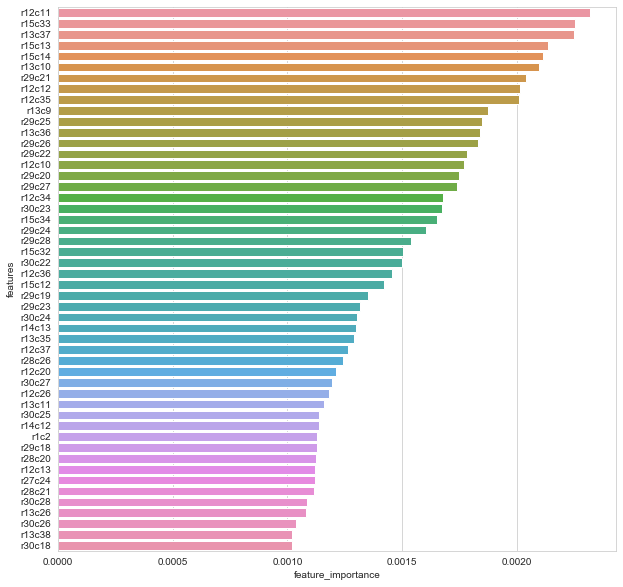

In [235]:
fig, axs = plt.subplots(1, 1, figsize = (10,10))

sns.barplot(x = feature_impdf['feature_importance'].sort_values(ascending = False)[0:50],
           y = feature_impdf['feature_importance'].sort_values(ascending = False)[0:50].index)
#plt.ylim(0,.0025)

# Question 8

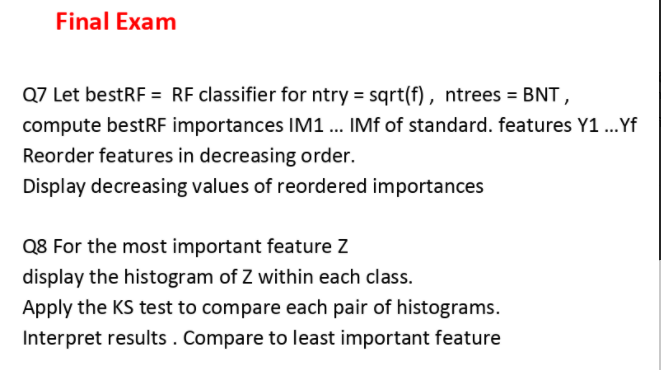

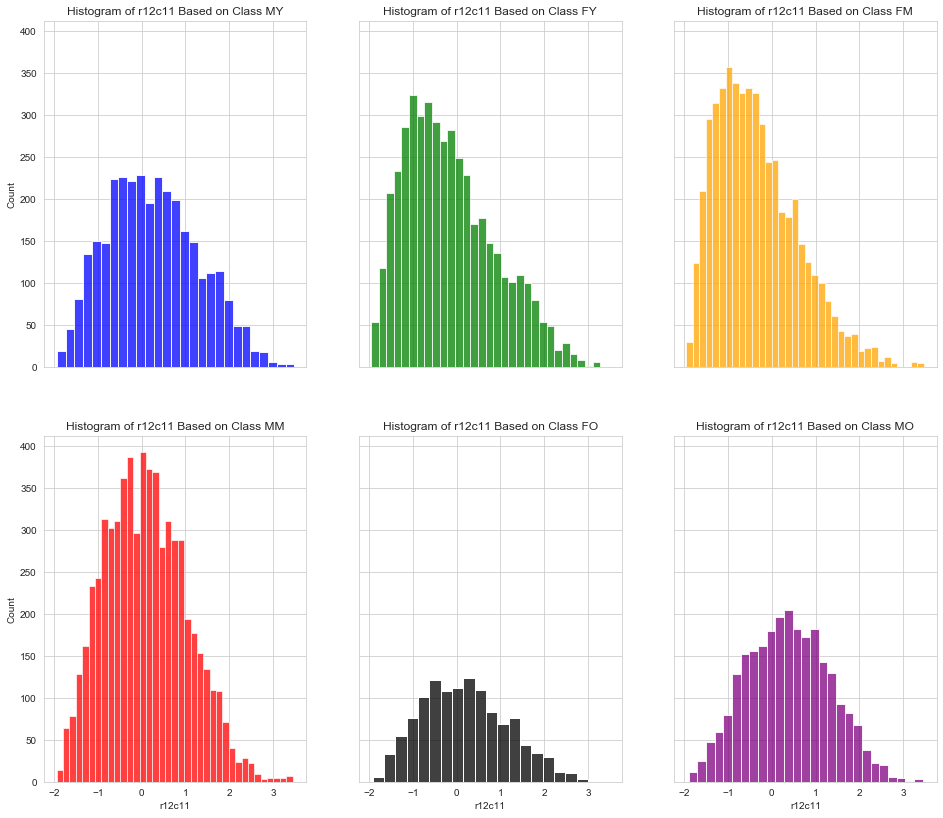

In [237]:
top = feature_impdf['feature_importance'].sort_values(ascending = False).index[0]
bottom = feature_impdf['feature_importance'].sort_values().index[0]

fig, axes = plt.subplots(2, 3, figsize = (16,14), sharex=True, sharey=True)

for i in range(0,len(classes)):
    sns.histplot(sdf[sdf['class'] == classes[i]][top], color = color_dic[classes[i]], ax=axes[i//3,i%3])
    axes[i//3,i%3].title.set_text('Histogram of %s Based on Class %s' % (top, classes[i]))

In [238]:
select_feat = [top, bottom,'class']
select_df = sdf[select_feat]

# KS-test to Compare Histograms Between Pairs of Classes
 #   Null hypotheses: Two group histograms are equal
 #   Alternative hypotheses: Two group histograms are different (two-tailed)

KS_test_results_1_2 = {}
KS_test_results_1_3 = {}
KS_test_results_1_4 = {}
KS_test_results_1_5 = {}
KS_test_results_1_6 = {}
KS_test_results_2_3 = {}
KS_test_results_2_4 = {}
KS_test_results_2_5 = {}
KS_test_results_2_6 = {}
KS_test_results_3_4 = {}
KS_test_results_3_5 = {}
KS_test_results_3_6 = {}
KS_test_results_4_5 = {}
KS_test_results_4_6 = {}
KS_test_results_5_6 = {}
 
# loop over column_list and execute code explained above
for column in select_df.columns[:2]:
    groupFY = select_df[select_df['class'] == 'FY'][column]
    groupFM = select_df[select_df['class'] == 'FM'][column]
    groupFO = select_df[select_df['class'] == 'FO'][column]
    groupMY = select_df[select_df['class'] == 'MY'][column]
    groupMM = select_df[select_df['class'] == 'MM'][column]
    groupMO = select_df[select_df['class'] == 'MO'][column]
    # add the output to the dictionary  
    KS_test_results_1_2[column] = stats.ks_2samp(groupFY,groupFM)
    KS_test_results_1_3[column] = stats.ks_2samp(groupFY,groupFO)
    KS_test_results_1_4[column] = stats.ks_2samp(groupFY,groupMY)
    KS_test_results_1_5[column] = stats.ks_2samp(groupFY,groupMM)
    KS_test_results_1_6[column] = stats.ks_2samp(groupFY,groupMO)
    KS_test_results_2_3[column] = stats.ks_2samp(groupFM,groupFO)
    KS_test_results_2_4[column] = stats.ks_2samp(groupFM,groupMY)
    KS_test_results_2_5[column] = stats.ks_2samp(groupFM,groupMM)
    KS_test_results_2_6[column] = stats.ks_2samp(groupFM,groupMO)
    KS_test_results_3_4[column] = stats.ks_2samp(groupFO,groupMY)
    KS_test_results_3_5[column] = stats.ks_2samp(groupFO,groupMM)
    KS_test_results_3_6[column] = stats.ks_2samp(groupFO,groupMO)
    KS_test_results_4_5[column] = stats.ks_2samp(groupMY,groupMM)
    KS_test_results_4_6[column] = stats.ks_2samp(groupMY,groupMO)
    KS_test_results_5_6[column] = stats.ks_2samp(groupMM,groupMO)
 

    # KS Test
KS_results_df_1_2 = pd.DataFrame.from_dict(KS_test_results_1_2,orient='Index')
KS_results_df_1_2.columns = ['KS statistic for Group FY & FM','pvalue for Group FY & FM']
KS_results_df_1_3 = pd.DataFrame.from_dict(KS_test_results_1_3,orient='Index')
KS_results_df_1_3.columns = ['KS statistic for Group FY & FO','pvalue for Group FY & FO']
KS_results_df_1_4 = pd.DataFrame.from_dict(KS_test_results_1_4,orient='Index')
KS_results_df_1_4.columns = ['KS statistic for Group FY & MY','pvalue for Group FY & MY']
KS_results_df_1_5 = pd.DataFrame.from_dict(KS_test_results_1_5,orient='Index')
KS_results_df_1_5.columns = ['KS statistic for Group FY & MM','pvalue for Group FY & MM']
KS_results_df_1_6 = pd.DataFrame.from_dict(KS_test_results_1_6,orient='Index')
KS_results_df_1_6.columns = ['KS statistic for Group FY & MO','pvalue for Group FY & MO']
KS_results_df_2_3 = pd.DataFrame.from_dict(KS_test_results_2_3,orient='Index')
KS_results_df_2_3.columns = ['KS statistic for Group FM & FO','pvalue for Group FM & FO']
KS_results_df_2_4 = pd.DataFrame.from_dict(KS_test_results_2_4,orient='Index')
KS_results_df_2_4.columns = ['KS statistic for Group FM & MY','pvalue for Group FM & MY']
KS_results_df_2_5 = pd.DataFrame.from_dict(KS_test_results_2_5,orient='Index')
KS_results_df_2_5.columns = ['KS statistic for Group FM & MM','pvalue for Group FM & MM']
KS_results_df_2_6 = pd.DataFrame.from_dict(KS_test_results_2_6,orient='Index')
KS_results_df_2_6.columns = ['KS statistic for Group FM & MO','pvalue for Group FM & MO']
KS_results_df_3_4 = pd.DataFrame.from_dict(KS_test_results_3_4,orient='Index')
KS_results_df_3_4.columns = ['KS statistic for Group FO & MY','pvalue for Group FO & MY']
KS_results_df_3_5 = pd.DataFrame.from_dict(KS_test_results_3_5,orient='Index')
KS_results_df_3_5.columns = ['KS statistic for Group FO & MM','pvalue for Group FO & MM']
KS_results_df_3_6 = pd.DataFrame.from_dict(KS_test_results_3_6,orient='Index')
KS_results_df_3_6.columns = ['KS statistic for Group FO & MO','pvalue for Group FO & MO']
KS_results_df_4_5 = pd.DataFrame.from_dict(KS_test_results_4_5,orient='Index')
KS_results_df_4_5.columns = ['KS statistic for Group MY & MM','pvalue for Group MY & MM']
KS_results_df_4_6 = pd.DataFrame.from_dict(KS_test_results_4_6,orient='Index')
KS_results_df_4_6.columns = ['KS statistic for Group MY & MO','pvalue for Group MY & MO']
KS_results_df_5_6 = pd.DataFrame.from_dict(KS_test_results_5_6,orient='Index')
KS_results_df_5_6.columns = ['KS statistic for Group MM & MO','pvalue for Group MM & MO']

 
KS_test_Results_df = pd.concat([KS_results_df_1_2, 
                                KS_results_df_1_3, 
                                KS_results_df_1_4,
                                KS_results_df_1_5,
                                KS_results_df_1_6,
                                KS_results_df_2_3,
                                KS_results_df_2_4,
                                KS_results_df_2_5,
                                KS_results_df_2_6,
                                KS_results_df_3_4,
                                KS_results_df_3_5,
                                KS_results_df_3_6,
                                KS_results_df_4_5,
                                KS_results_df_4_6,
                                KS_results_df_5_6], axis=1)
KS_test_Results_df
 
# Discrimnation Power based of KS Results
pow12 = 1 - KS_test_Results_df.iloc[:,1]
pow13 = 1 - KS_test_Results_df.iloc[:,3]
pow14 = 1 - KS_test_Results_df.iloc[:,5]
pow15 = 1 - KS_test_Results_df.iloc[:,7]
pow16 = 1 - KS_test_Results_df.iloc[:,9]
pow23 = 1 - KS_test_Results_df.iloc[:,11]
pow24 = 1 - KS_test_Results_df.iloc[:,13]
pow25 = 1 - KS_test_Results_df.iloc[:,15]
pow26 = 1 - KS_test_Results_df.iloc[:,17]
pow34 = 1 - KS_test_Results_df.iloc[:,19]
pow35 = 1 - KS_test_Results_df.iloc[:,21]
pow36 = 1 - KS_test_Results_df.iloc[:,23]
pow45 = 1 - KS_test_Results_df.iloc[:,25]
pow46 = 1 - KS_test_Results_df.iloc[:,27]
pow56 = 1 - KS_test_Results_df.iloc[:,29]
 
Discrim_Power = pd.concat([pow12, 
                           pow13, 
                           pow14, 
                           pow15, 
                           pow16, 
                           pow23,
                           pow24,
                           pow25,
                           pow26,
                           pow35,
                           pow36,
                           pow45,
                           pow46,
                           pow56], axis=1)
# Discrim_Power.columns = ['KS - Discriminating Power of Group FY & FM', 'KS - Discriminating Power of Group FY & FO', 'KS - Discriminating Power of Group FM & FO']

In [239]:
KS_test_Results_df

,KS statistic for Group FY & FM,pvalue for Group FY & FM,KS statistic for Group FY & FO,pvalue for Group FY & FO,KS statistic for Group FY & MY,pvalue for Group FY & MY,KS statistic for Group FY & MM,pvalue for Group FY & MM,KS statistic for Group FY & MO,pvalue for Group FY & MO,...,KS statistic for Group FO & MM,pvalue for Group FO & MM,KS statistic for Group FO & MO,pvalue for Group FO & MO,KS statistic for Group MY & MM,pvalue for Group MY & MM,KS statistic for Group MY & MO,pvalue for Group MY & MO,KS statistic for Group MM & MO,pvalue for Group MM & MO
r12c11,0.075389,2.761680e-12,0.165112,3.330669e-16,0.181057,1.221245e-15,0.150581,3.596227e-52,0.255327,2.442491e-15,...,0.048436,1.672953e-02,0.100617,1.142710e-07,0.071926,6.111820e-10,0.08077,1.786078e-08,0.127877,2.470914e-26
r34c6,0.116641,2.997602e-15,0.078084,1.756505e-05,0.139358,1.221245e-15,0.092653,5.785734e-20,0.113095,2.442491e-15,...,0.085801,6.272824e-07,0.045020,6.980049e-02,0.180190,4.773959e-15,0.15250,4.329870e-15,0.067133,1.471231e-07


In [240]:
Discrim_Power

,pvalue for Group FY & FM,pvalue for Group FY & FO,pvalue for Group FY & MY,pvalue for Group FY & MM,pvalue for Group FY & MO,pvalue for Group FM & FO,pvalue for Group FM & MY,pvalue for Group FM & MM,pvalue for Group FM & MO,pvalue for Group FO & MM,pvalue for Group FO & MO,pvalue for Group MY & MM,pvalue for Group MY & MO,pvalue for Group MM & MO
r12c11,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.983270,1.0000,1.0,1.0,1.0
r34c6,1.0,0.999982,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999999,0.9302,1.0,1.0,1.0


# Question 9

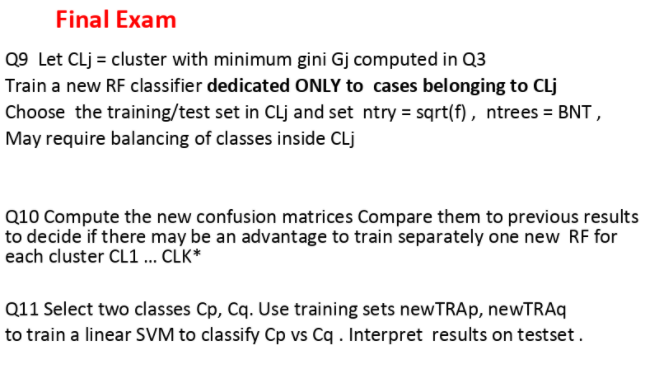

In [253]:
for i in range(0,len(GINI)):
    print('when using k=' + str(i+1), min(GINI[i]))

when using k=1 0.8003525547115051
when using k=2 0.7737275438188416
when using k=3 0.7570300553807751
when using k=4 0.7528559749060025
when using k=5 0.7525521342419793
when using k=6 0.7433588943155478
when using k=7 0.7316895963951088
when using k=8 0.7356080916076799
when using k=9 0.7310037446623018
when using k=10 0.7375197187928669


In [242]:
GINI[8]

[0.7507522907429135,
 0.7731044035993755,
 0.7381218653100198,
 0.7310037446623018,
 0.7636904328016874,
 0.7746554189142235,
 0.7917465660584361,
 0.7978664078853086,
 0.7879200475907199]

In [243]:
for i in range(0,len(GINI[8])):
    print('cluster label='+str(i), GINI[8][i])

cluster label=0 0.7507522907429135
cluster label=1 0.7731044035993755
cluster label=2 0.7381218653100198
cluster label=3 0.7310037446623018
cluster label=4 0.7636904328016874
cluster label=5 0.7746554189142235
cluster label=6 0.7917465660584361
cluster label=7 0.7978664078853086
cluster label=8 0.7879200475907199


In [257]:
cluster9 = sX.copy()
cluster9['cluster9'] = labels_k[8]
cluster9 = cluster9.join(df.loc[:,'class'])

cluster9.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r47c40,r47c41,r47c42,r47c43,r47c44,r47c45,r47c46,r47c47,cluster9,class
0,0.576152,0.623301,0.659906,0.637140,0.629673,0.622634,0.594041,0.529915,0.491089,0.441334,...,0.420359,0.465837,0.507639,0.520347,0.502876,0.518309,0.509758,0.498227,6,MY
1,1.074744,-0.173171,0.401842,1.291656,1.296929,1.283150,1.280058,1.306439,1.243496,1.222190,...,1.692029,1.915696,1.811823,1.723962,1.313249,0.998590,0.827658,0.524505,6,MY
2,-0.307069,-0.232169,-0.205369,-0.235547,-0.291775,-0.392305,-0.434986,-0.395306,-0.328199,-0.220697,...,0.163167,0.156158,0.160782,0.151056,0.111197,0.064710,0.046153,-0.001058,8,MY
3,1.487864,1.641014,1.722525,1.790334,1.773540,1.750344,1.721069,1.653396,1.577899,1.510767,...,1.749183,1.732704,1.700829,1.696607,1.677916,1.705671,1.741621,1.812135,1,MY
4,1.616073,1.759010,1.889508,1.946171,1.932410,1.895335,1.851739,1.785571,1.711661,1.663544,...,0.891877,0.874050,0.868371,0.889638,0.867544,0.798473,0.734937,0.695313,1,MY


In [259]:
clu9 = cluster9[cluster9['cluster9'] == 3]

In [260]:
clu9FY_train, clu9FY_test, clFY_train, clFY_test = train_test_split(clu9[clu9['class'] == 'FY'].iloc[:,0:2304], clu9[clu9['class'] == 'FY'].loc[:,'class'], test_size=0.2, random_state=0)
clu9FM_train, clu9FM_test, clFM_train, clFM_test = train_test_split(clu9[clu9['class'] == 'FM'].iloc[:,0:2304], clu9[clu9['class'] == 'FM'].loc[:,'class'], test_size=0.2, random_state=0)
clu9FO_train, clu9FO_test, clFO_train, clFO_test = train_test_split(clu9[clu9['class'] == 'FO'].iloc[:,0:2304], clu9[clu9['class'] == 'FO'].loc[:,'class'], test_size=0.2, random_state=0)
clu9MY_train, clu9MY_test, clMY_train, clMY_test = train_test_split(clu9[clu9['class'] == 'MY'].iloc[:,0:2304], clu9[clu9['class'] == 'MY'].loc[:,'class'], test_size=0.2, random_state=0)
clu9MM_train, clu9MM_test, clMM_train, clMM_test = train_test_split(clu9[clu9['class'] == 'MM'].iloc[:,0:2304], clu9[clu9['class'] == 'MM'].loc[:,'class'], test_size=0.2, random_state=0)
clu9MO_train, clu9MO_test, clMO_train, clMO_test = train_test_split(clu9[clu9['class'] == 'MO'].iloc[:,0:2304], clu9[clu9['class'] == 'MO'].loc[:,'class'], test_size=0.2, random_state=0)


X_train_clu9 = pd.concat([clu9FY_train, clu9FM_train, clu9FO_train, clu9MY_train, clu9MM_train, clu9MO_train]) 
X_test_clu9 = pd.concat([clu9FY_test, clu9FM_test, clu9FO_test, clu9MY_test, clu9MM_test, clu9MO_test])
y_train_clu9 = pd.concat([clFY_train, clFM_train, clFO_train, clMY_train, clMM_train, clMO_train])
y_test_clu9 = pd.concat([clFY_test, clFM_test, clFO_test, clMY_test, clMM_test, clMO_test])

In [261]:
print(len(clu9FO_train))
print(len(clu9FY_train))
print(len(clu9MY_train))
print(len(clu9FM_train))
print(len(clu9MO_train))
print(len(clu9MM_train))

77
192
224
265
325
872


In [262]:
upper = {'FO':240, 'FY':260, 'MY':280, 'FM':300}
under = {'MO':320, 'MM':350}

sm = SMOTE(random_state=0, sampling_strategy=upper, k_neighbors=30)
X_res_train_clu9, y_res_train_clu9 = sm.fit_resample(X_train_clu9, y_train_clu9)
print('Resampled dataset shape %s' % Counter(y_res_train_clu9))

rus = RandomUnderSampler(random_state=0, sampling_strategy=under)
X_res_train_clu9, y_res_train_clu9 = rus.fit_resample(X_res_train_clu9, y_res_train_clu9)
print('Resampled dataset shape %s' % Counter(y_res_train_clu9))

Resampled dataset shape Counter({'MM': 872, 'MO': 325, 'FM': 300, 'MY': 280, 'FY': 260, 'FO': 240})
Resampled dataset shape Counter({'MM': 350, 'MO': 320, 'FM': 300, 'MY': 280, 'FY': 260, 'FO': 240})


In [263]:
print(len(clu9FO_test))
print(len(clu9FY_test))
print(len(clu9MY_test))
print(len(clu9FM_test))
print(len(clu9MO_test))
print(len(clu9MM_test))

20
48
56
67
82
218


In [264]:
upper = {'FO':70, 'FY':75, 'MY':80, 'FM':85, 'MO':90, }
under = {'MM':100}

sm = SMOTE(random_state=0, sampling_strategy=upper)
X_res_test_clu9, y_res_test_clu9 = sm.fit_resample(X_test_clu9, y_test_clu9)
print('Resampled dataset shape %s' % Counter(y_res_test_clu9))

rus = RandomUnderSampler(random_state=0, sampling_strategy=under)
X_res_test_clu9, y_res_test_clu9 = rus.fit_resample(X_res_test_clu9, y_res_test_clu9)
print('Resampled dataset shape %s' % Counter(y_res_test_clu9))

Resampled dataset shape Counter({'MM': 218, 'MO': 90, 'FM': 85, 'MY': 80, 'FY': 75, 'FO': 70})
Resampled dataset shape Counter({'MM': 100, 'MO': 90, 'FM': 85, 'MY': 80, 'FY': 75, 'FO': 70})


In [274]:
y_pred_train_clu9 = None
y_pred_test_clu9 = None

bestRF = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', random_state=0, oob_score=True)
bestRF.fit(X_res_train_clu9, y_res_train_clu9)
y_pred_train_clu9 = bestRF.predict(X_res_train_clu9)
y_pred_test_clu9 = bestRF.predict(X_res_test_clu9)

In [275]:
bestRF.oob_score

True

# Question 10

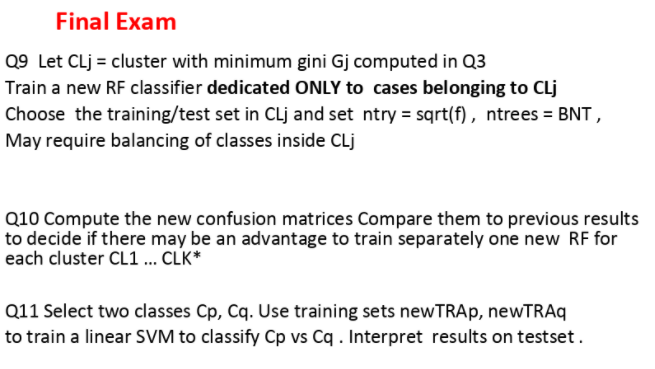

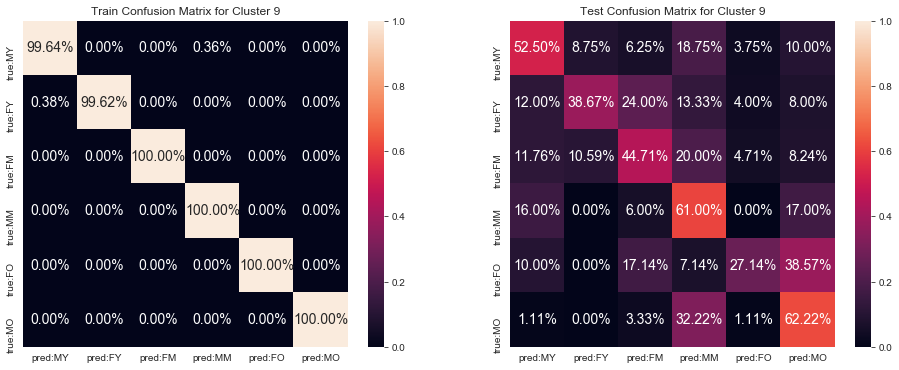

In [276]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))

cmtx_a_train = pd.DataFrame(
confusion_matrix(y_true=y_res_train_clu9,y_pred = y_pred_train_clu9, labels = classes, normalize = 'true'),
index=classes_index, 
columns=classes_columns)

sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1, ax = axes[0])
axes[0].title.set_text('Train Confusion Matrix for Cluster 9')

cmtx_a_train = pd.DataFrame(
confusion_matrix(y_true=y_res_test_clu9,y_pred = y_pred_test_clu9, labels = classes, normalize = 'true'),
index=classes_index, 
columns=classes_columns)

sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1, ax = axes[1])
axes[1].title.set_text('Test Confusion Matrix for Cluster 9')

# Question 11

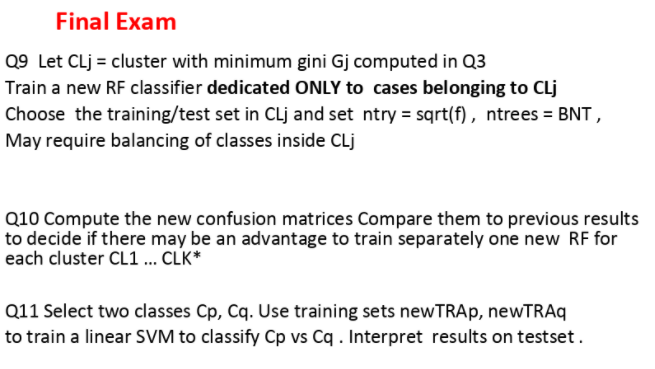

In [334]:
# Narrowing to just rows that fall under Cp & Cq
sdfFM_train, sdfFM_test, clFM_train, clFM_test = train_test_split(sdf[sdf['class'] == 'FM'].iloc[:,0:2304], sdf[sdf['class'] == 'FM'].iloc[:,2304], test_size=0.2, random_state=0)
sdfMY_train, sdfMY_test, clMY_train, clMY_test = train_test_split(sdf[sdf['class'] == 'MY'].iloc[:,0:2304], sdf[sdf['class'] == 'MY'].iloc[:,2304], test_size=0.2, random_state=0)

X_train_SVM = pd.concat([sdfFM_train, sdfMY_train]) 
X_test_SVM = pd.concat([sdfFM_test, sdfMY_test])
y_train_SVM = pd.concat([clFM_train, clMY_train])
y_test_SVM = pd.concat([clFM_test, clMY_test])

In [335]:
sm = SMOTE(random_state=0, k_neighbors=30)
X_res_train_SVM, y_res_train_SVM = sm.fit_resample(X_train_SVM, y_train_SVM)
print('Resampled dataset shape %s' % Counter(y_res_train_SVM))

sm = SMOTE(random_state=0)
X_res_test_SVM, y_res_test_SVM = sm.fit_resample(X_test_SVM, y_test_SVM)
print('Resampled dataset shape %s' % Counter(y_res_test_SVM))

Resampled dataset shape Counter({'FM': 4132, 'MY': 4132})
Resampled dataset shape Counter({'FM': 1034, 'MY': 1034})


In [337]:
# SVM
start = time.time()
svm = SVC(kernel='linear') # Linear Kernel
#svclassifier = SVC(kernel='poly', degree=8)
svm.fit(X_res_train_SVM, y_res_train_SVM)
# Predicting the train/test Set results
y_pred_train_SVM = svm.predict(X_res_train_SVM)
y_pred_test_SVM = svm.predict(X_res_test_SVM)

end = time.time()

print(end-start)

487.0371124744415


In [338]:
# Performances
trainperf_SVM = accuracy_score(y_res_train_SVM, y_pred_train_SVM)
testperf_SVM = accuracy_score(y_res_test_SVM, y_pred_test_SVM)

print(trainperf_SVM)
print(testperf_SVM)

0.9938286544046466
0.8351063829787234


Text(0.5, 1, 'Confusion Matrix - SVM')

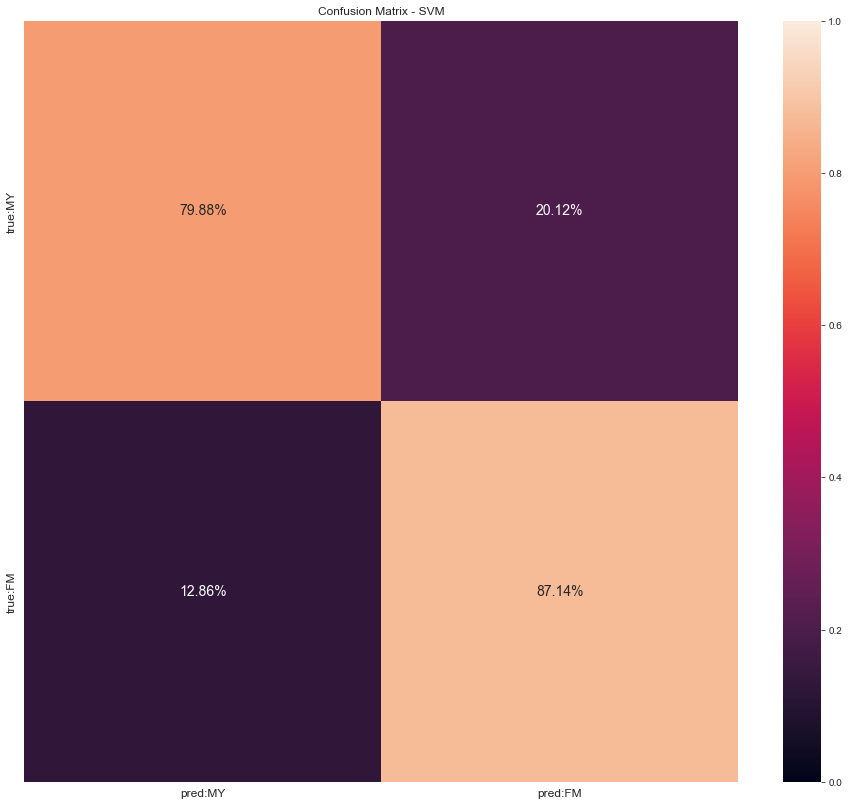

In [339]:
Perf_SVM = pd.DataFrame({'train Performance': trainperf_SVM, 'test Performance': testperf_SVM }, index =[0]).T
testconf_SVM = confusion_matrix(y_res_test_SVM, y_pred_test_SVM, labels = ['MY', 'FM'], normalize = 'true')

# Visuals for Report
cmtx_SVM = pd.DataFrame(testconf_SVM ,
    index=['true:MY', 'true:FM'], 
    columns=['pred:MY', 'pred:FM'])

# Confusion Matrix Plots 
plt.figure(figsize=(16,14))
a = sns.heatmap(cmtx_SVM, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
a.set_xticklabels(a.get_xticklabels(), rotation = 0, fontsize = 12, horizontalalignment = "center")
a.set_yticklabels(a.get_yticklabels(), fontsize = 12, verticalalignment = 'center')
a.set_title("Confusion Matrix - SVM")

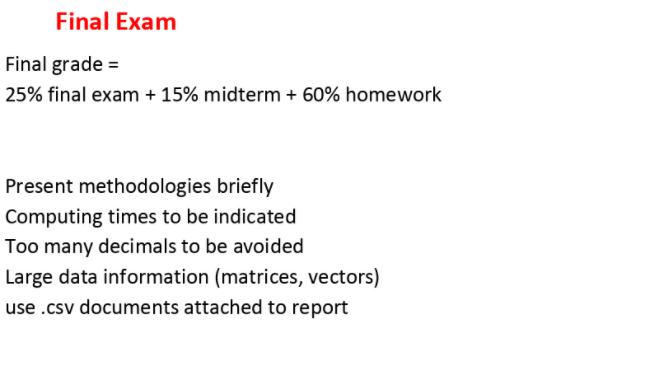

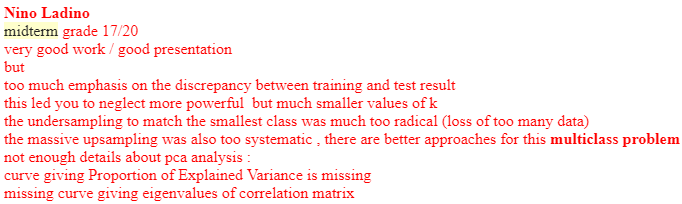